In [1]:
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'

path = r'model/'

df = pd.read_csv(path +"Train_ER_alpha.csv" , header = 0)
#df = pd.read_csv(path +"Train_ER_alpha.smi" ,sep= "\t")
#df = df.ix[:,0] # select first column
ID = df.chemblId
smiles = df.SMILES_desalt
#smiles.to_csv('smiles/Train_smi_only.smi', header=False ,index=False)
len(smiles)

1238

In [2]:
df.dtypes

acdAcidicPka             float64
acdBasicPka              float64
acdLogd                  float64
acdLogp                  float64
alogp                    float64
chemblId                  object
knownDrug                 object
molecularFormula          object
molecularWeight          float64
numRo5Violations         float64
passesRuleOfThree         object
preferredCompoundName     object
rotatableBonds           float64
smiles                    object
species                   object
stdInChiKey               object
synonyms                  object
activity_comment          object
assay_chemblid            object
assay_description         object
assay_type                object
bioactivity_type          object
name_in_reference         object
operator                  object
organism                  object
parent_cmpd_chemblid      object
reference                 object
target_chemblid           object
target_confidence          int64
target_name               object
units     

In [3]:
df.head(2)

,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,chemblId,knownDrug,molecularFormula,molecularWeight,numRo5Violations,...,organism,parent_cmpd_chemblid,reference,target_chemblid,target_confidence,target_name,units,value,STATUS,SMILES_desalt
0,7.69,NaN,0.33,0.50,3.31,CHEMBL370037,No,C16H12O3,252.26,0.0,...,Homo sapiens,CHEMBL370037,"Bioorg. Med. Chem. Lett., (2005) 15:12:3137",CHEMBL206,9,Estrogen receptor alpha,nM,6.0,active,CC1=C(c2ccc(O)cc2)C(=O)c2ccc(O)cc21
1,8.15,NaN,4.06,4.12,3.86,CHEMBL189073,No,C17H11NO3,277.27,0.0,...,Homo sapiens,CHEMBL189073,"J. Med. Chem., (2004) 47:21:5021",CHEMBL206,9,Estrogen receptor alpha,nM,1727.0,active,Oc1ccc2c(-c3cccc4ccc(O)cc34)noc2c1


In [4]:
df.numRo5Violations.value_counts()

0.0    817
1.0    313
2.0     98
3.0      1
Name: numRo5Violations, dtype: int64

In [5]:
len(df)

1238

In [6]:
df2 = df[np.isfinite(df['numRo5Violations'])]
len(df2)

1229

In [7]:
df1 = df[pd.isnull(df['numRo5Violations'])]
len(df1)

9

In [8]:
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

#path = r'/Users/zeromtmu/Desktop/Adjust_ER_alpha/smiles/'
#mols = SmilesMolSupplier(path +"Train_smi_only.smi")
#mols = SDMolSupplier("molecule.sdf")
mols = []

for i in df1.SMILES_desalt:
        mol = MolFromSmiles(i)
        mols.append(mol)
MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

data = pd.DataFrame(
    {'chemblId': df1.chemblId,
     'STATUS' : df1.STATUS,
     'IC50' : df1.value,
     'MW': MW, 
     'LogP': LogP,
     'nHAcc': nHAcc,
     'nHDon': nHDon
    })
data = data[['chemblId','STATUS','IC50','MW','LogP','nHAcc','nHDon']]

In [9]:
data

,chemblId,STATUS,IC50,MW,LogP,nHAcc,nHDon
1061,CHEMBL3235685,active,115.0,272.420,2.70060,2,2
1062,CHEMBL3235686,active,26.2,328.528,4.09764,2,2
1097,CHEMBL3597498,active,35.0,1086.442,-2.08543,15,15
1098,CHEMBL3597499,active,13.0,1128.483,-2.56106,15,17
1099,CHEMBL3597501,active,620.0,1146.455,-2.58026,14,18
1100,CHEMBL3597505,active,110.0,1090.387,-2.60606,13,17
1101,CHEMBL3597508,active,749.0,2350.921,-13.50034,32,46
1102,CHEMBL3597509,active,94.0,2392.962,-13.97597,32,48
1105,CHEMBL3597502,active,670.0,1023.340,-1.77016,12,16


In [10]:
# Convert IC50 to pIC50

from math import log10

def pIC50(df0):
    pIC50 = []

    for i in df0.IC50:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-log10(molar))
    #Y = pIC50

    df0['pIC50'] = pIC50
    df0 = df0.drop('IC50', 1)
        
    return df0

In [11]:
data       = pIC50(data)
data

,chemblId,STATUS,MW,LogP,nHAcc,nHDon,pIC50
1061,CHEMBL3235685,active,272.420,2.70060,2,2,6.939302
1062,CHEMBL3235686,active,328.528,4.09764,2,2,7.581699
1097,CHEMBL3597498,active,1086.442,-2.08543,15,15,7.455932
1098,CHEMBL3597499,active,1128.483,-2.56106,15,17,7.886057
1099,CHEMBL3597501,active,1146.455,-2.58026,14,18,6.207608
1100,CHEMBL3597505,active,1090.387,-2.60606,13,17,6.958607
1101,CHEMBL3597508,active,2350.921,-13.50034,32,46,6.125518
1102,CHEMBL3597509,active,2392.962,-13.97597,32,48,7.026872
1105,CHEMBL3597502,active,1023.340,-1.77016,12,16,6.173925


In [12]:
data['numRo5Violations'] = [0,0,1,1,1,1,1,1,1]

In [13]:
data

,chemblId,STATUS,MW,LogP,nHAcc,nHDon,pIC50,numRo5Violations
1061,CHEMBL3235685,active,272.420,2.70060,2,2,6.939302,0
1062,CHEMBL3235686,active,328.528,4.09764,2,2,7.581699,0
1097,CHEMBL3597498,active,1086.442,-2.08543,15,15,7.455932,1
1098,CHEMBL3597499,active,1128.483,-2.56106,15,17,7.886057,1
1099,CHEMBL3597501,active,1146.455,-2.58026,14,18,6.207608,1
1100,CHEMBL3597505,active,1090.387,-2.60606,13,17,6.958607,1
1101,CHEMBL3597508,active,2350.921,-13.50034,32,46,6.125518,1
1102,CHEMBL3597509,active,2392.962,-13.97597,32,48,7.026872,1
1105,CHEMBL3597502,active,1023.340,-1.77016,12,16,6.173925,1


In [14]:
# Convert IC50 to pIC50

from math import log10

def pIC50(df0):
    pIC50 = []

    for i in df0.value:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-log10(molar))
    #Y = pIC50

    df0['pIC50'] = pIC50
    df0 = df0.drop('value', 1)
        
    return df0

In [15]:
df2.head(2)

,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,chemblId,knownDrug,molecularFormula,molecularWeight,numRo5Violations,...,organism,parent_cmpd_chemblid,reference,target_chemblid,target_confidence,target_name,units,value,STATUS,SMILES_desalt
0,7.69,NaN,0.33,0.50,3.31,CHEMBL370037,No,C16H12O3,252.26,0.0,...,Homo sapiens,CHEMBL370037,"Bioorg. Med. Chem. Lett., (2005) 15:12:3137",CHEMBL206,9,Estrogen receptor alpha,nM,6.0,active,CC1=C(c2ccc(O)cc2)C(=O)c2ccc(O)cc21
1,8.15,NaN,4.06,4.12,3.86,CHEMBL189073,No,C17H11NO3,277.27,0.0,...,Homo sapiens,CHEMBL189073,"J. Med. Chem., (2004) 47:21:5021",CHEMBL206,9,Estrogen receptor alpha,nM,1727.0,active,Oc1ccc2c(-c3cccc4ccc(O)cc34)noc2c1


In [16]:
df2       = pIC50(df2)
df2.head(2)

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,chemblId,knownDrug,molecularFormula,molecularWeight,numRo5Violations,...,organism,parent_cmpd_chemblid,reference,target_chemblid,target_confidence,target_name,units,STATUS,SMILES_desalt,pIC50
0,7.69,NaN,0.33,0.50,3.31,CHEMBL370037,No,C16H12O3,252.26,0.0,...,Homo sapiens,CHEMBL370037,"Bioorg. Med. Chem. Lett., (2005) 15:12:3137",CHEMBL206,9,Estrogen receptor alpha,nM,active,CC1=C(c2ccc(O)cc2)C(=O)c2ccc(O)cc21,8.221849
1,8.15,NaN,4.06,4.12,3.86,CHEMBL189073,No,C17H11NO3,277.27,0.0,...,Homo sapiens,CHEMBL189073,"J. Med. Chem., (2004) 47:21:5021",CHEMBL206,9,Estrogen receptor alpha,nM,active,Oc1ccc2c(-c3cccc4ccc(O)cc34)noc2c1,5.762708


In [17]:
data2 = df2[['numRo5Violations','pIC50']]
data = data[['numRo5Violations','pIC50']]

In [20]:
df2.head(2)

,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,chemblId,knownDrug,molecularFormula,molecularWeight,numRo5Violations,...,organism,parent_cmpd_chemblid,reference,target_chemblid,target_confidence,target_name,units,STATUS,SMILES_desalt,pIC50
0,7.69,NaN,0.33,0.50,3.31,CHEMBL370037,No,C16H12O3,252.26,0.0,...,Homo sapiens,CHEMBL370037,"Bioorg. Med. Chem. Lett., (2005) 15:12:3137",CHEMBL206,9,Estrogen receptor alpha,nM,active,CC1=C(c2ccc(O)cc2)C(=O)c2ccc(O)cc21,8.221849
1,8.15,NaN,4.06,4.12,3.86,CHEMBL189073,No,C17H11NO3,277.27,0.0,...,Homo sapiens,CHEMBL189073,"J. Med. Chem., (2004) 47:21:5021",CHEMBL206,9,Estrogen receptor alpha,nM,active,Oc1ccc2c(-c3cccc4ccc(O)cc34)noc2c1,5.762708


In [21]:
Ro5.to_csv('SubFiles/RAW_all.csv', sep=',' ,index=False)

In [18]:
Ro5 = data.append(data2, ignore_index=True)
Ro5.head(2)

,numRo5Violations,pIC50
0,0.0,6.939302
1,0.0,7.581699


In [19]:
Ro5.to_csv('SubFiles/RO5_Violations.csv', sep=',' ,index=False)

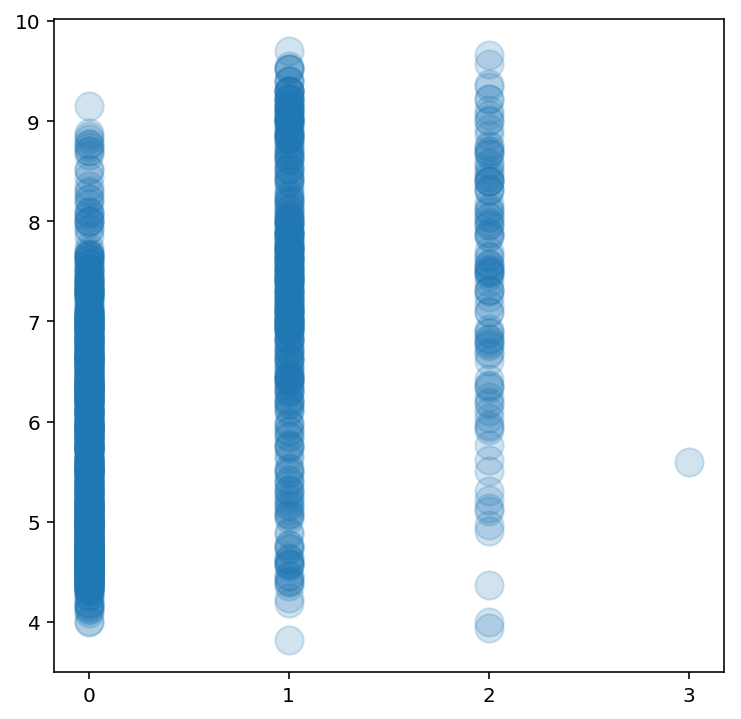

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) # default is (8,6)
plt.scatter(Ro5['numRo5Violations'], Ro5['pIC50'], s=200, alpha=0.2)
plt.xticks(np.arange(min(Ro5['numRo5Violations']), max(Ro5['numRo5Violations'])+1, 1.0))
plt.show()

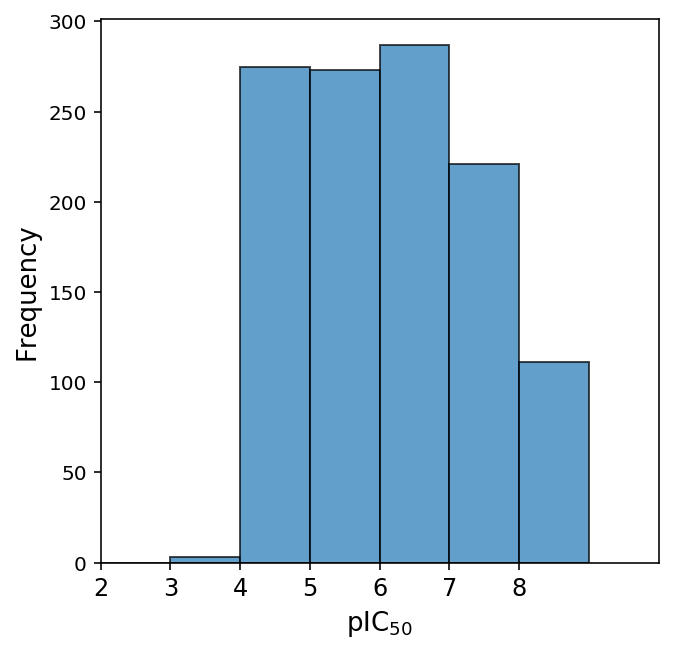

In [20]:
import matplotlib 

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    
bins = range(10)

ax = Ro5.plot(x='numRo5Violations', 
         y='pIC50', 
         kind='hist',
         alpha=0.7,
         figsize=(5,5),
         edgecolor='black', 
         legend=False,
         bins=bins)

bins_labels(bins, fontsize=12)

plt.rcParams["axes.labelweight"] = "bold"
ax.set_xlabel('pIC$_{50}$', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)

plt.xlim(xmin=2, xmax = 10)
plt.savefig('Result/RO5 pIC50 Violations.pdf', dpi=300, bbox_inches='tight')
plt.show()

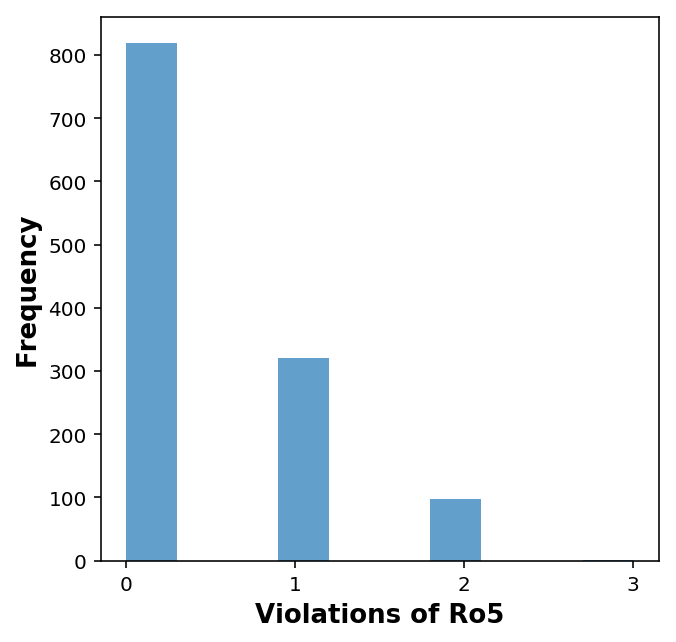

In [21]:
import matplotlib.pyplot as plt

ax = Ro5.hist(column='numRo5Violations',
        grid=False, 
        alpha=0.7,
        figsize=(5,5),
        sharey=True, 
        sharex=True)

plt.title('')
plt.xlabel('Violations of Ro5', fontsize=13, weight='bold')
plt.ylabel('Frequency', fontsize=13, weight='bold')
plt.xticks(np.arange(min(Ro5['numRo5Violations']), max(Ro5['numRo5Violations'])+1, 1.0))
plt.savefig('Result/RO5 Violations.pdf', dpi=300, bbox_inches='tight')
plt.show()

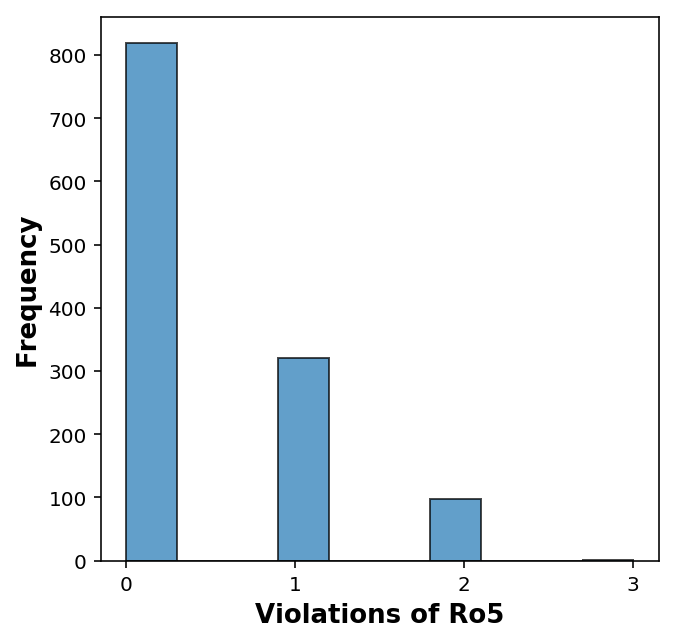

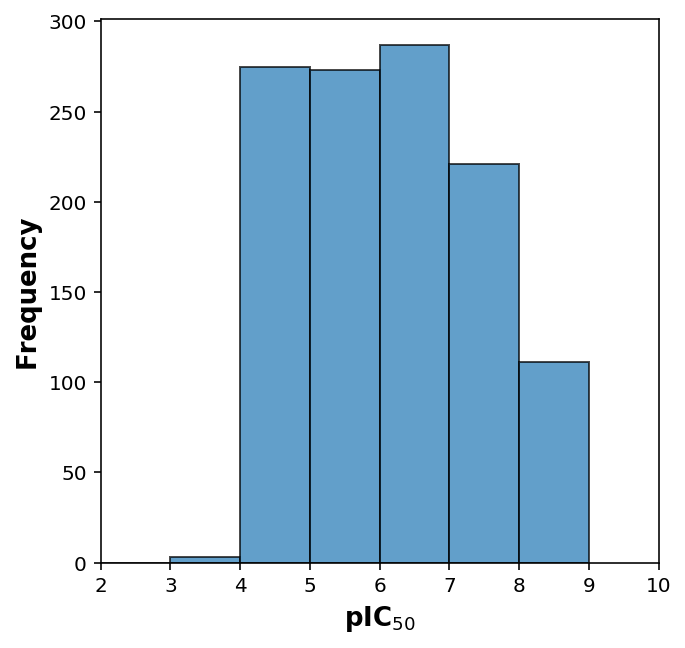

In [22]:
import matplotlib.pyplot as plt

ax1 = fig.add_subplot(111)
ax1 = Ro5.hist(column='numRo5Violations',
               grid=False, 
               alpha=0.7,
               figsize=(5,5),
               sharey=True, 
               sharex=True,
               edgecolor='black')


plt.title('')
plt.xlabel('Violations of Ro5', fontsize=13, weight='bold')
plt.ylabel('Frequency', fontsize=13, weight='bold')
plt.xticks(np.arange(min(Ro5['numRo5Violations']), max(Ro5['numRo5Violations'])+1, 1.0))


ax2 = fig.add_subplot(121)
ax2 = Ro5.plot(x='numRo5Violations', 
               y='pIC50', 
               kind='hist',
               alpha=0.7,
               figsize=(5,5),
               edgecolor='black', 
               legend=False,
               bins=bins)
ax2.set_xlabel('pIC$_{50}$', fontsize=13)
ax2.set_ylabel('Frequency', fontsize=13)
plt.xlim(xmin=2, xmax = 10)

#plt.savefig('Result/RO5 overview.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
Ro5.head(2)

,numRo5Violations,pIC50
0,0.0,6.939302
1,0.0,7.581699


/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


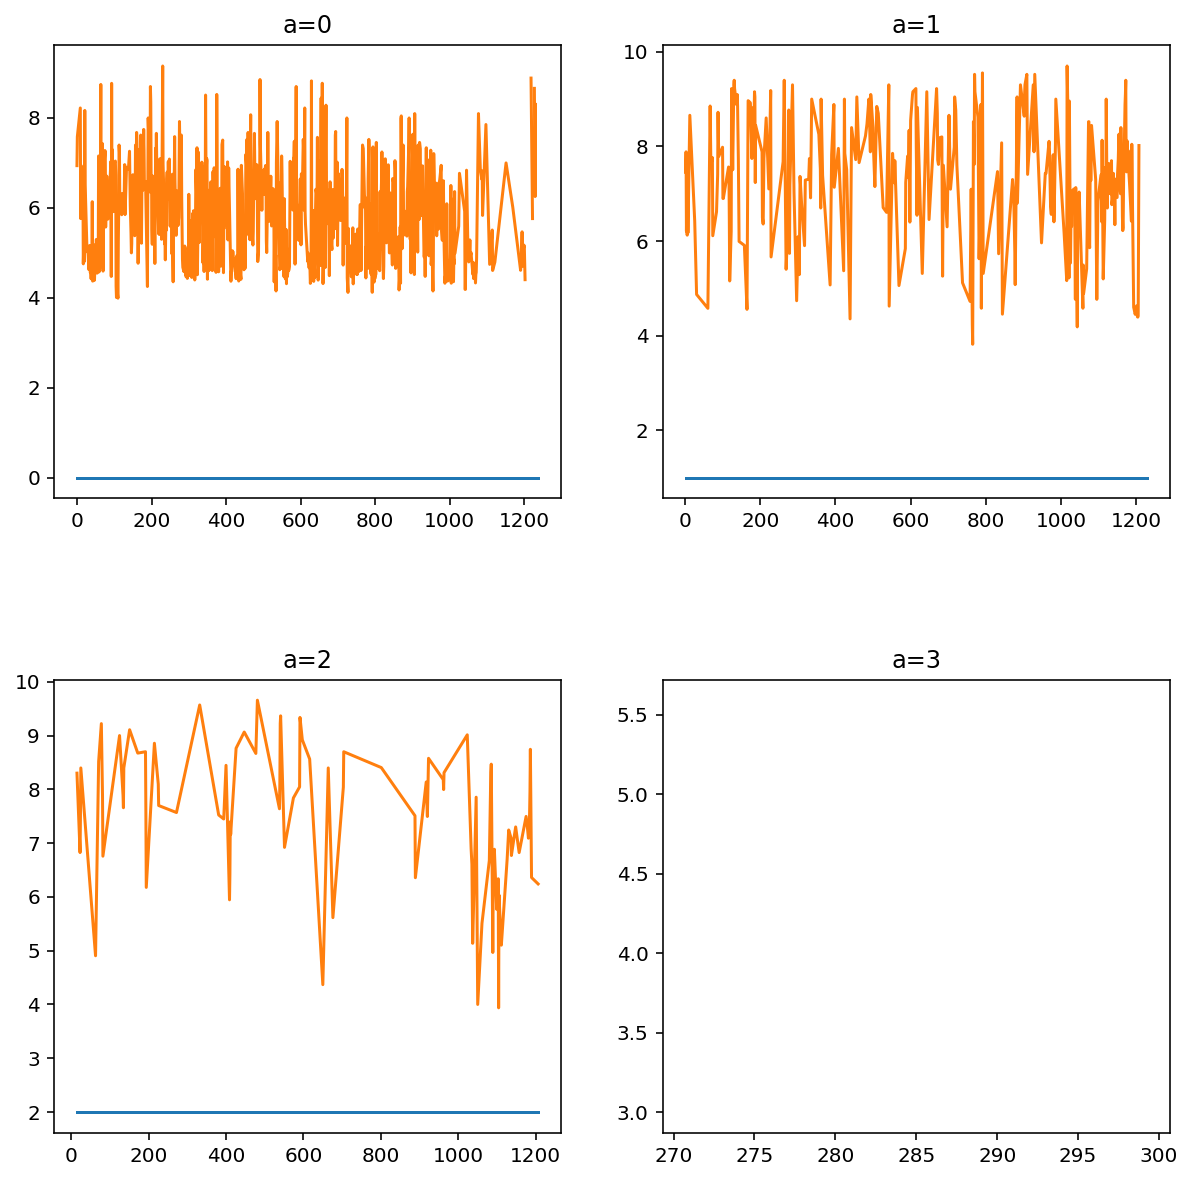

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = Ro5.groupby('numRo5Violations')
rowlength = grouped.ngroups/2                         # fix up if odd number of groups
fig, axs = plt.subplots(figsize=(10,10), 
                        nrows=2, ncols=rowlength,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    ax.plot(grouped.get_group(key))
    ax.set_title('a=%d'%key)
ax.legend()
plt.show()     

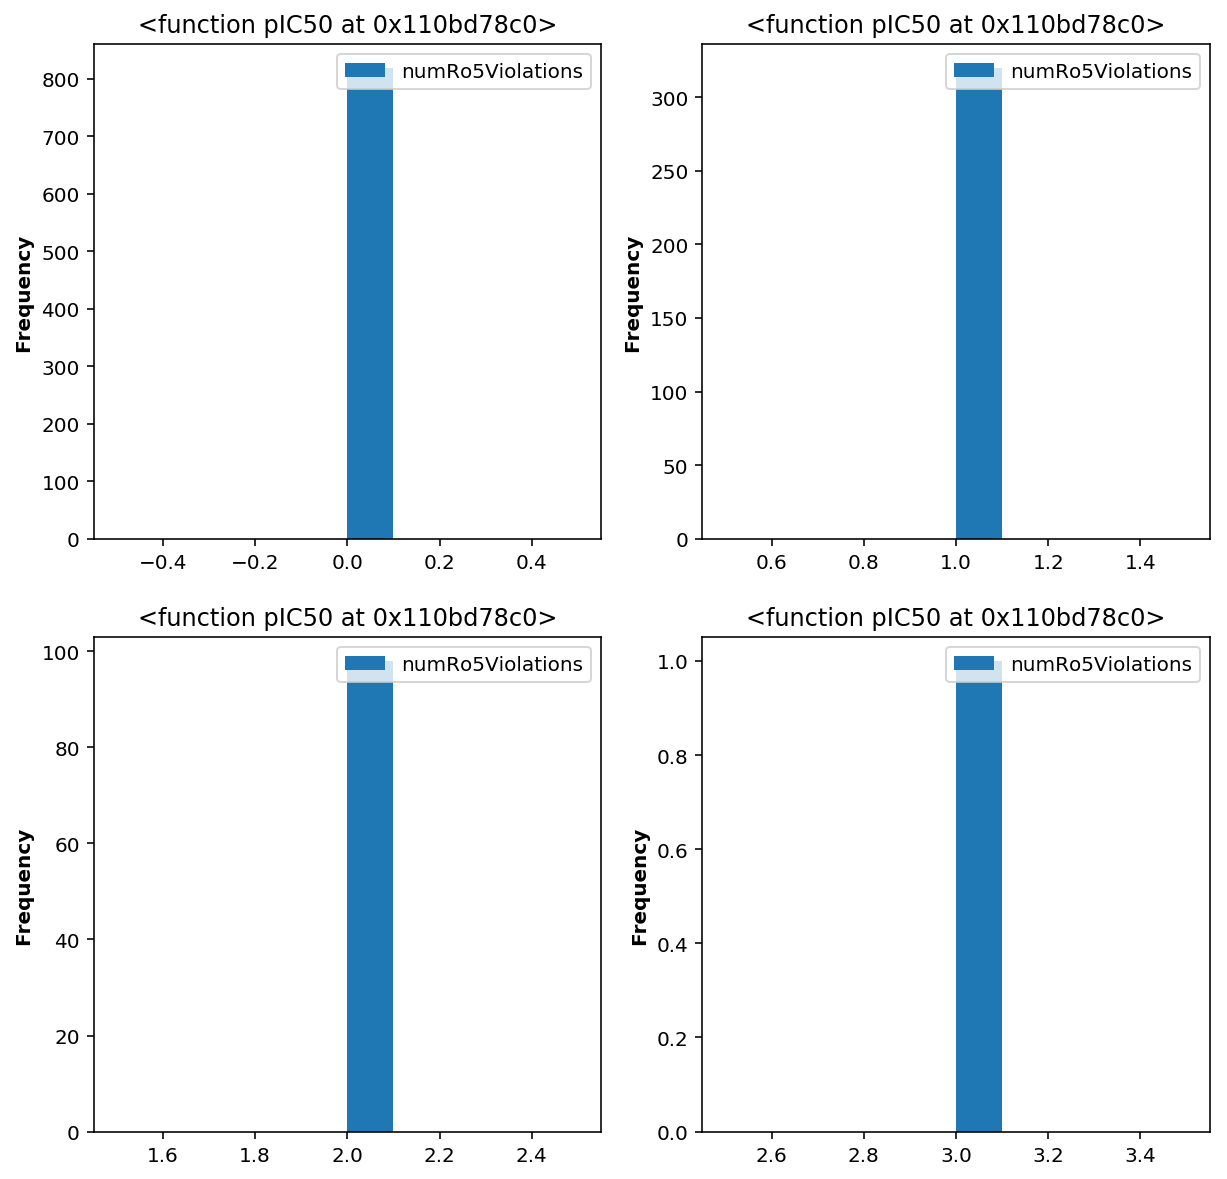

In [25]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
grouped = Ro5.groupby('numRo5Violations')
for (numRo5Violations, grouped), ax in zip(grouped, axes.flat):
    grouped.plot(x='pIC50', kind='hist', ax=ax, title=pIC50)
plt.show() 

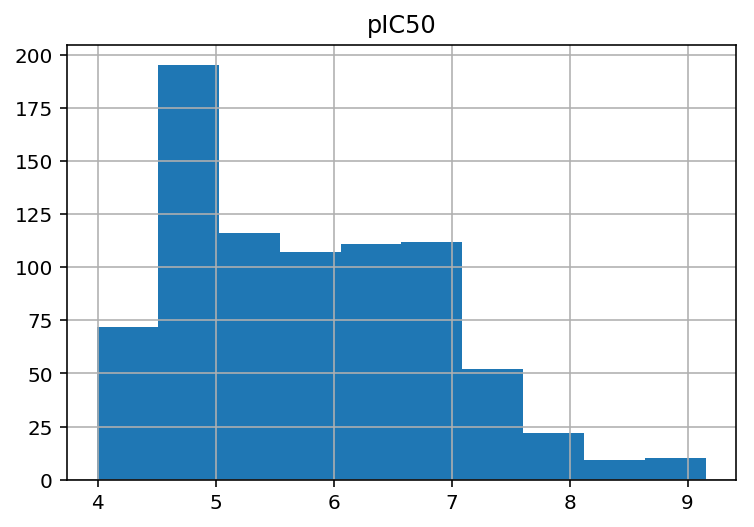

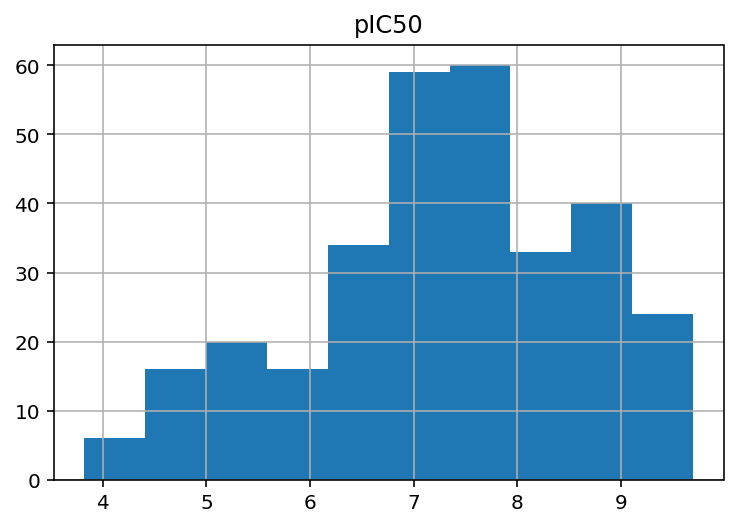

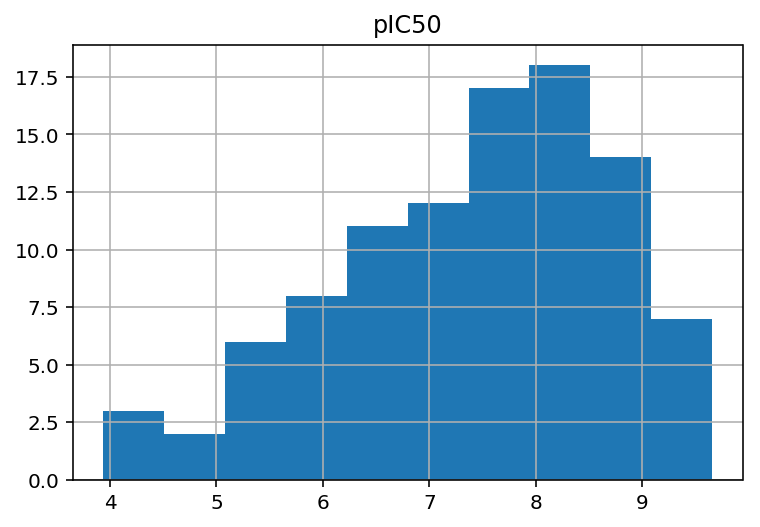

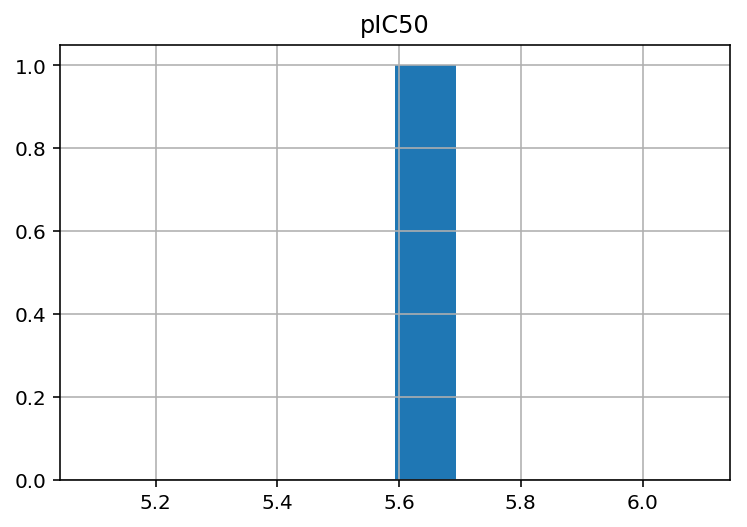

In [26]:
Ro5.groupby('numRo5Violations').hist()
plt.show()

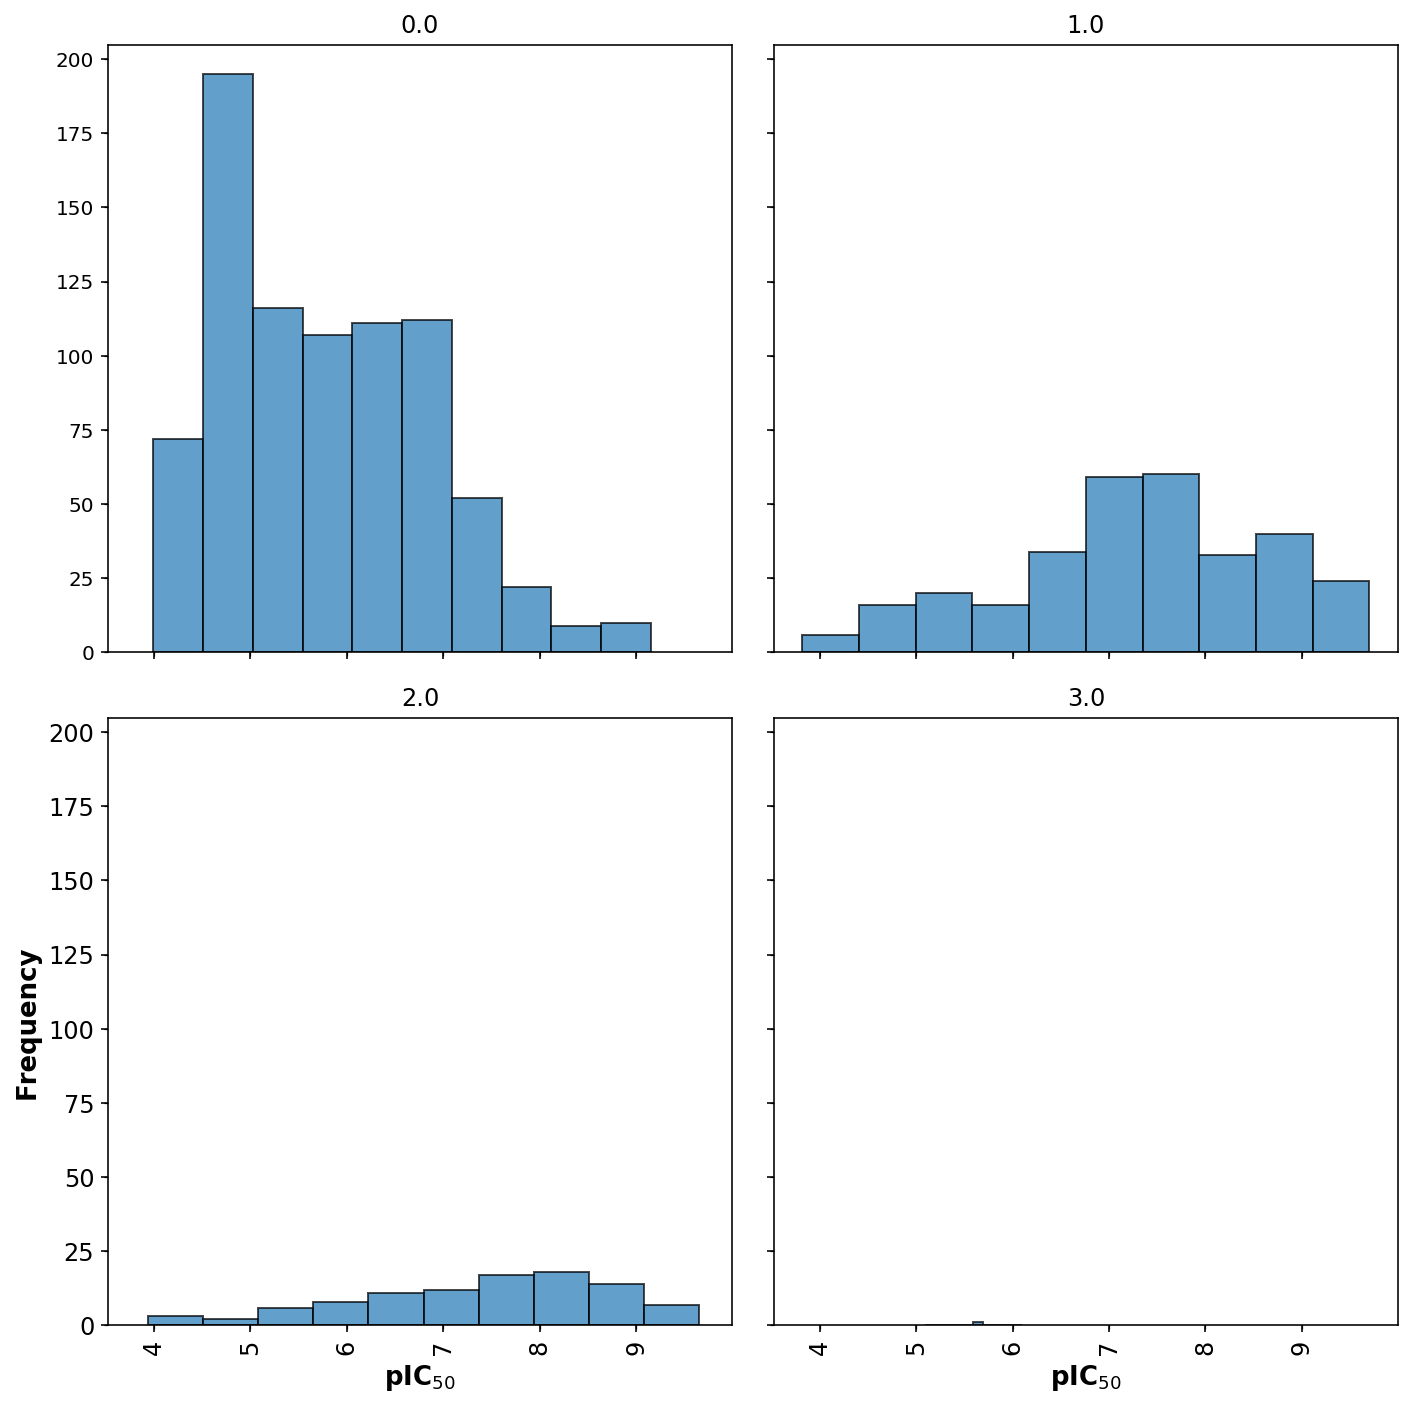

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

colors = np.array(list('bgrcmykw'))
fig, axes = Ro5['pIC50'].hist(by=Ro5['numRo5Violations'], 
                              grid=False, 
                              alpha=0.7,
                              figsize=(10,10),
                              sharey=True, 
                              sharex=True,
                              edgecolor='black')

for ax in axes:
    ax.set_xlabel('pIC$_{50}$', fontsize=13, weight='bold')
    ax.set_ylabel('Frequency', fontsize=13, weight='bold')
    
    for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(12)
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(12)
        
plt.tight_layout()
plt.savefig('Result/pIC50 each Violations.pdf', dpi=300, bbox_inches='tight')
plt.show() 

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1)

Ro5.plot(x='numRo5Violations', 
         kind='hist',
         grid=False, 
         alpha=0.7,
         figsize=(5,5),
         sharey=True, 
         sharex=True,
         edgecolor='black', ax=axes[0, 0])

plt.title('')
plt.xlabel('Violations of Ro5', fontsize=13, weight='bold')
plt.ylabel('Frequency', fontsize=13, weight='bold')
plt.xticks(np.arange(min(Ro5['numRo5Violations']), max(Ro5['numRo5Violations'])+1, 1.0))


Ro5.plot(x='numRo5Violations', 
         y='pIC50', 
         kind='hist',
         alpha=0.7,
         figsize=(5,5),
         edgecolor='black', 
         legend=False,
         bins=bins, ax=axes[1, 0])

ax2.set_xlabel('pIC$_{50}$', fontsize=13)
ax2.set_ylabel('Frequency', fontsize=13)
plt.xlim(xmin=2, xmax = 10)

#plt.savefig('Result/RO5 overview.pdf', dpi=300, bbox_inches='tight')
plt.show()

IndexError: too many indices for array

KeyError: 'MW'

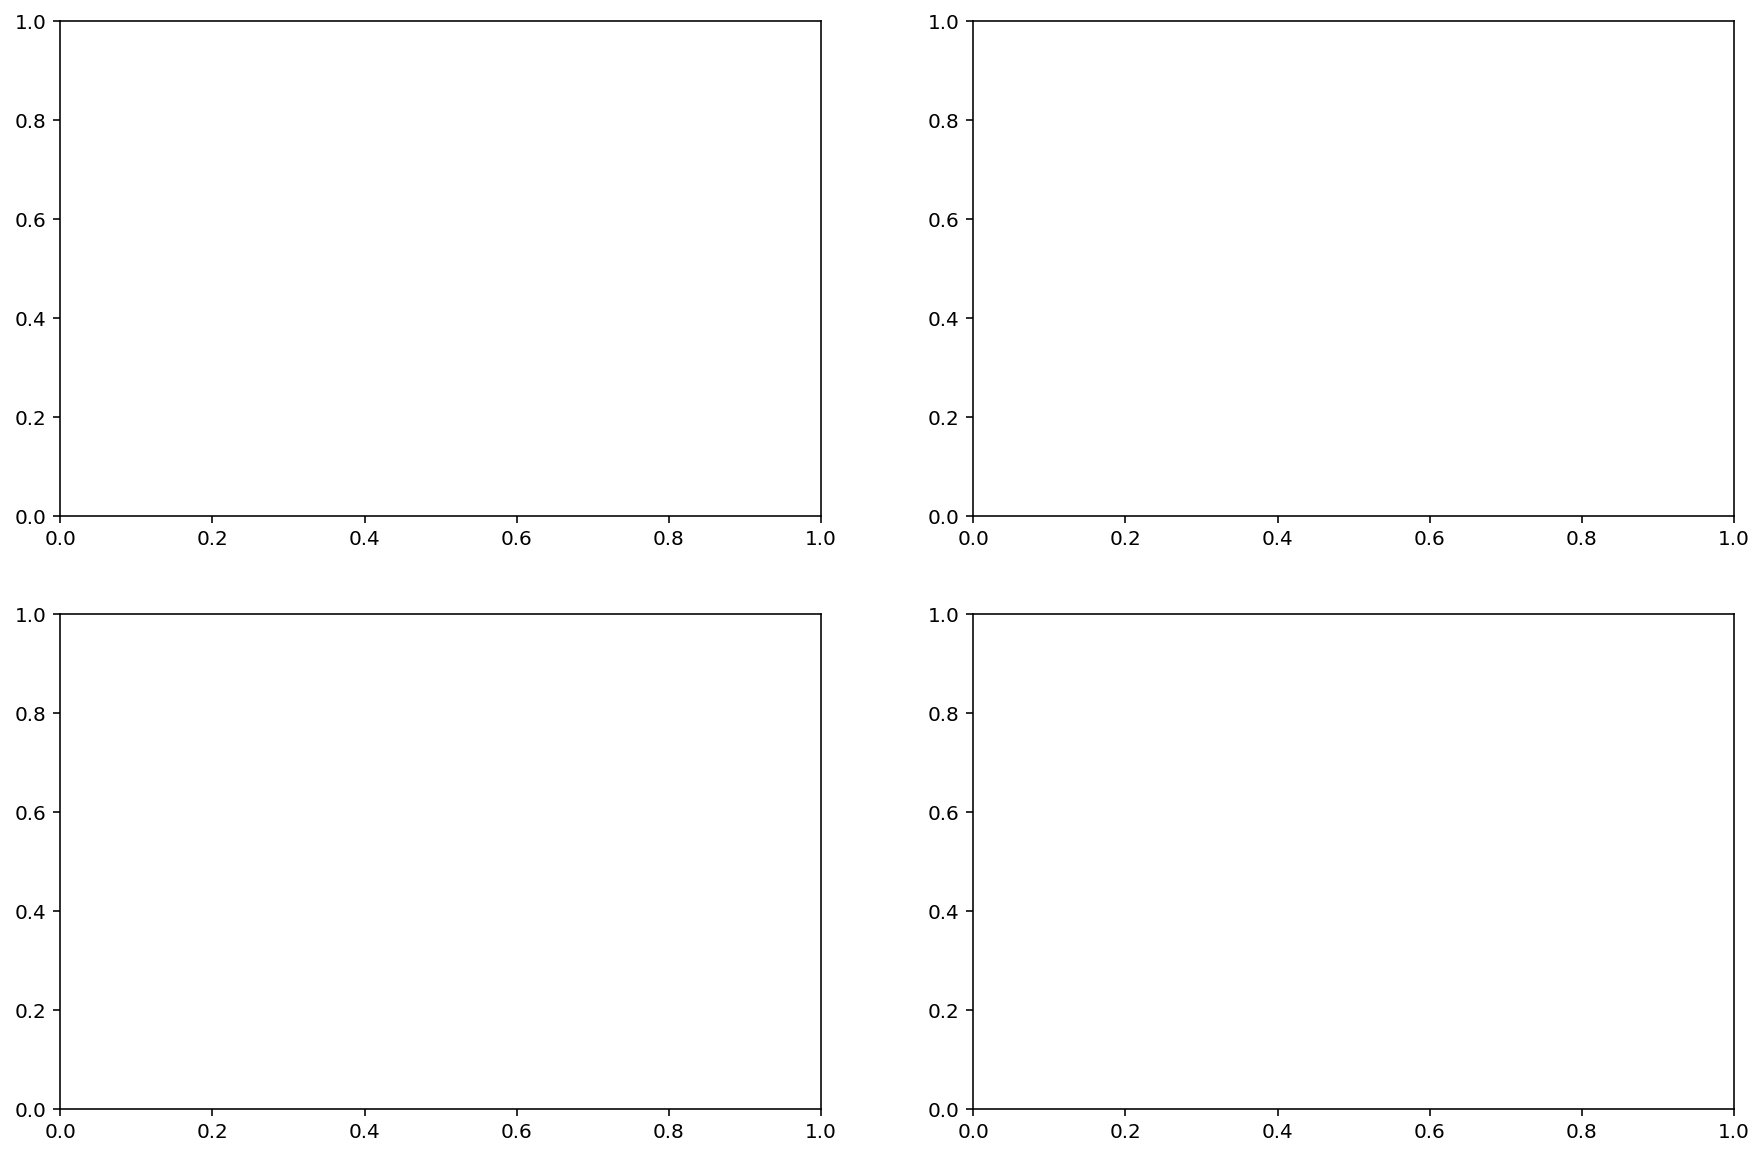

In [109]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)

# Histogram for MW
hist, bins = np.histogram(data['MW'], 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt1.bar(center, hist, align='center', width=width, color='blue',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt1.set_xlabel('Molecular weight (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)
#plt1.set_xlim(-0.5,10)
#plt1.set_ylim(-0.5,117)
#plt1.grid(True)
plt1.axvline(500, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histogram for LogP
hist, bins = np.histogram(data['LogP'], 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt2.bar(center, hist, align='center', width=width, color='red',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
plt2.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)
#plt2.set_xlim(-0.5,10)
#plt2.set_ylim(-0.5,117)
#plt2.grid(True)
plt2.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    
# Histogram for nHAcc
hist, bins = np.histogram(data['nHAcc'], 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt3.bar(center, hist, align='center', width=width, color='green',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt3.set_xlabel('Number of Hydrogen Bond Acceptors', fontsize=16, fontweight='bold')
plt3.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)
#plt3.set_xlim(-0.5,10)
#plt3.set_ylim(-0.5,650)
#plt3.grid(True)
plt3.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histogram for nHDon
hist, bins = np.histogram(data['nHDon'], 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt4.bar(center, hist, align='center', width=width, color='orange',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt4.set_xlabel('Number of Hydrogen Bond Donors', fontsize=16, fontweight='bold')
plt4.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)
#plt4.set_xlim(-0.5,10)
#plt4.set_ylim(-0.5,650)
#plt4.grid(True)
plt4.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

In [17]:
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

#path = r'/Users/zeromtmu/Desktop/Adjust_ER_alpha/smiles/'
#mols = SmilesMolSupplier(path +"Train_smi_only.smi")
#mols = SDMolSupplier("molecule.sdf")
mols = []

for i in df.SMILES_desalt:
        mol = MolFromSmiles(i)
        mols.append(mol)
MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

data = pd.DataFrame(
    {'chemblId': ID,
     'STATUS' : df.STATUS,
     'IC50' : df.value,
     'MW': MW, 
     'LogP': LogP,
     'nHAcc': nHAcc,
     'nHDon': nHDon
    })
data = data[['chemblId','STATUS','IC50','MW','LogP','nHAcc','nHDon']]

data.to_csv('SubFiles/IC50_RO5.csv', sep=',' ,index=False)

In [18]:
len(data)

1238

In [19]:
data.head(2)

,chemblId,STATUS,IC50,MW,LogP,nHAcc,nHDon
0,CHEMBL370037,active,6.0,252.269,3.2248,3,2
1,CHEMBL189073,active,1727.0,277.279,4.0592,4,2


In [20]:
data.dtypes

chemblId     object
STATUS       object
IC50        float64
MW          float64
LogP        float64
nHAcc         int64
nHDon         int64
dtype: object

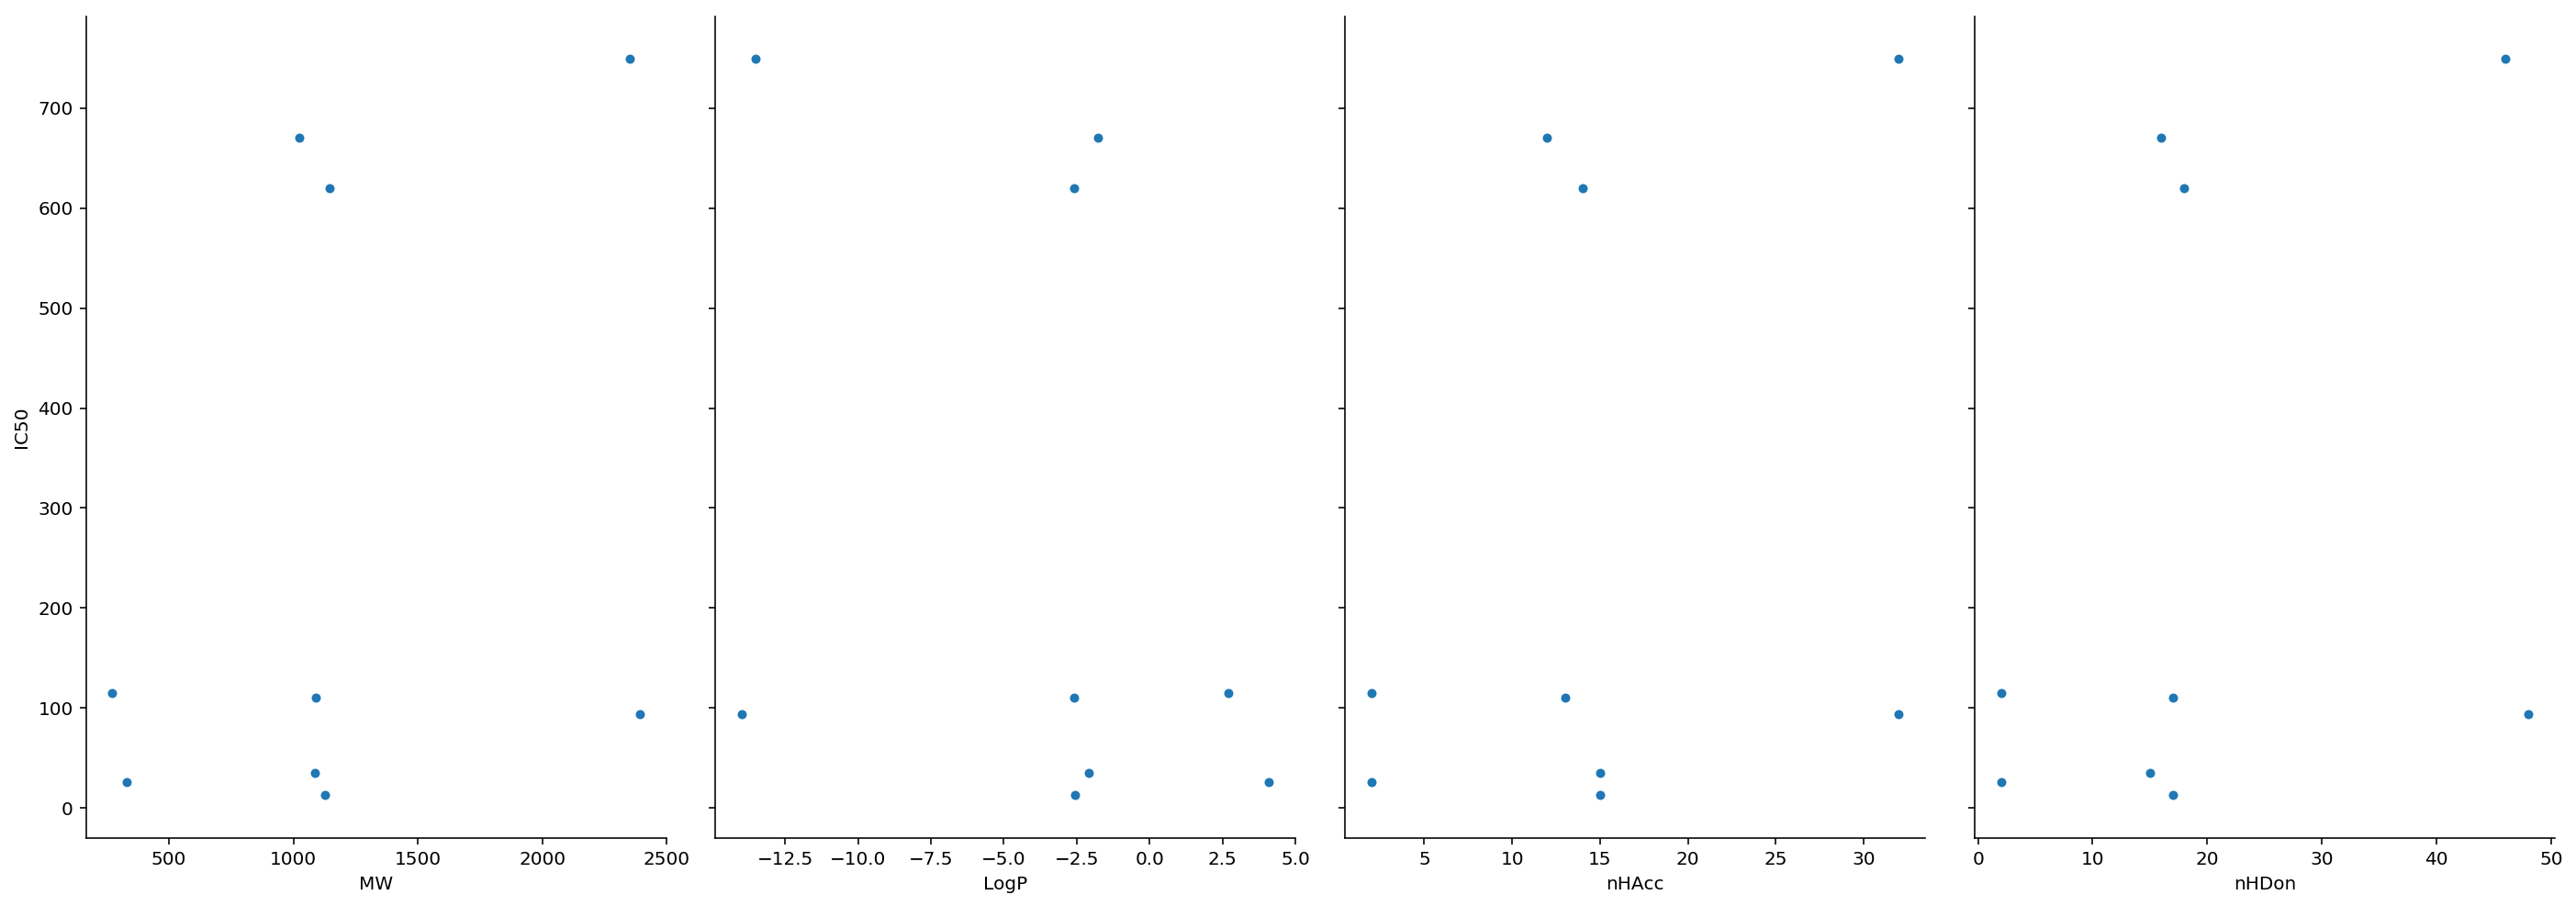

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['MW','LogP','nHAcc','nHDon'], y_vars='IC50', size=7, aspect=0.7)

plt.show()

In [23]:
data['MW'].describe()

count    1238.000000
mean      376.912141
std       133.967883
min       206.329000
25%       288.705000
50%       347.381500
75%       454.494250
max      2392.962000
Name: MW, dtype: float64

In [24]:
data['LogP'].describe()

count    1238.000000
mean        4.372207
std         1.710357
min       -13.975970
25%         3.449830
50%         4.167730
75%         5.381925
max        11.991200
Name: LogP, dtype: float64

In [25]:
#Grab DataFrame rows where column has certain values
data =  data[data.MW.between(100, 1000, inclusive=True)  &
        data.LogP.between(-5, 10, inclusive=True)   &
        data.nHAcc.between(0, 20, inclusive=True) &
        data.nHDon.between(0, 20, inclusive=True)] # The inclusive (True: <=, False: <)

len(data)

1225

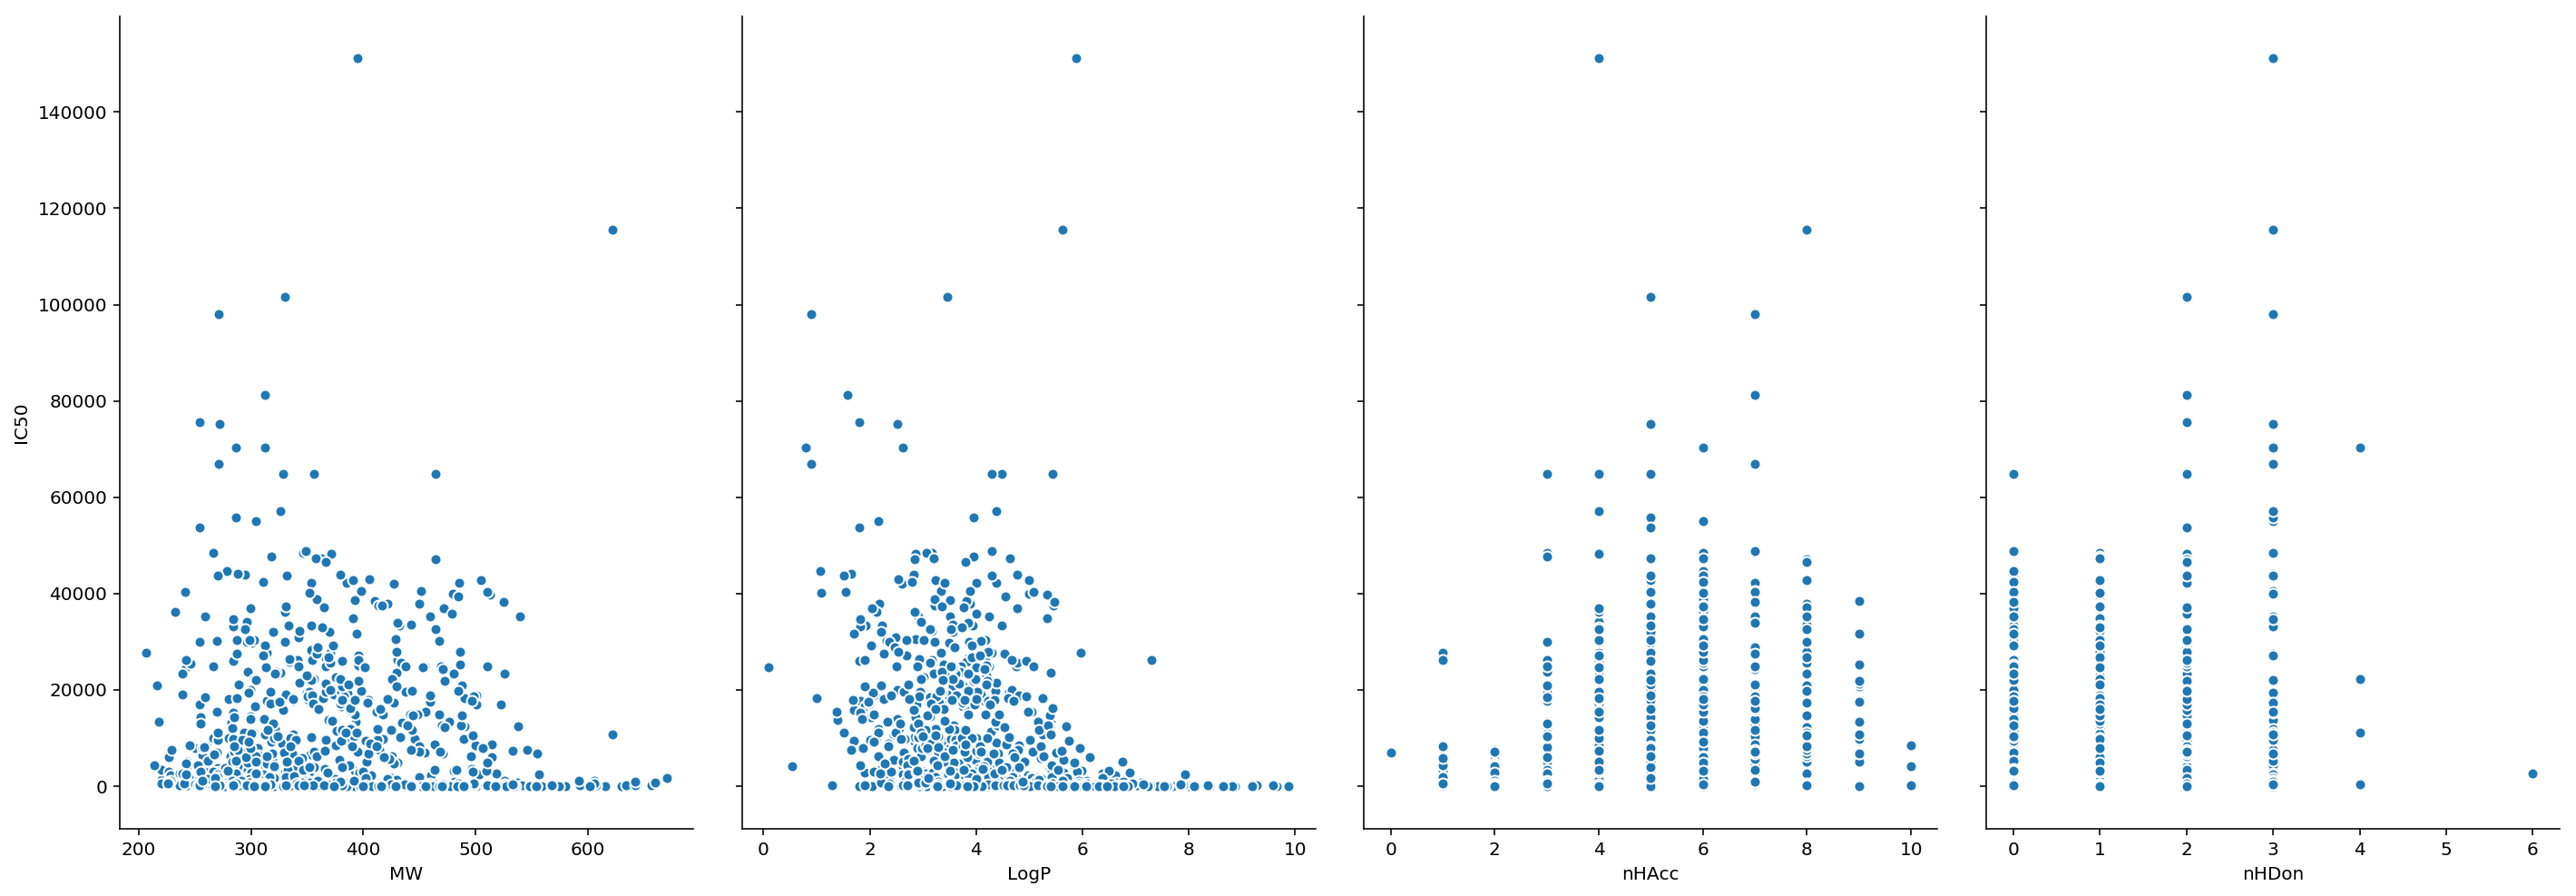

In [26]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['MW','LogP','nHAcc','nHDon'], y_vars='IC50', size=7, aspect=0.7)
plt.show()

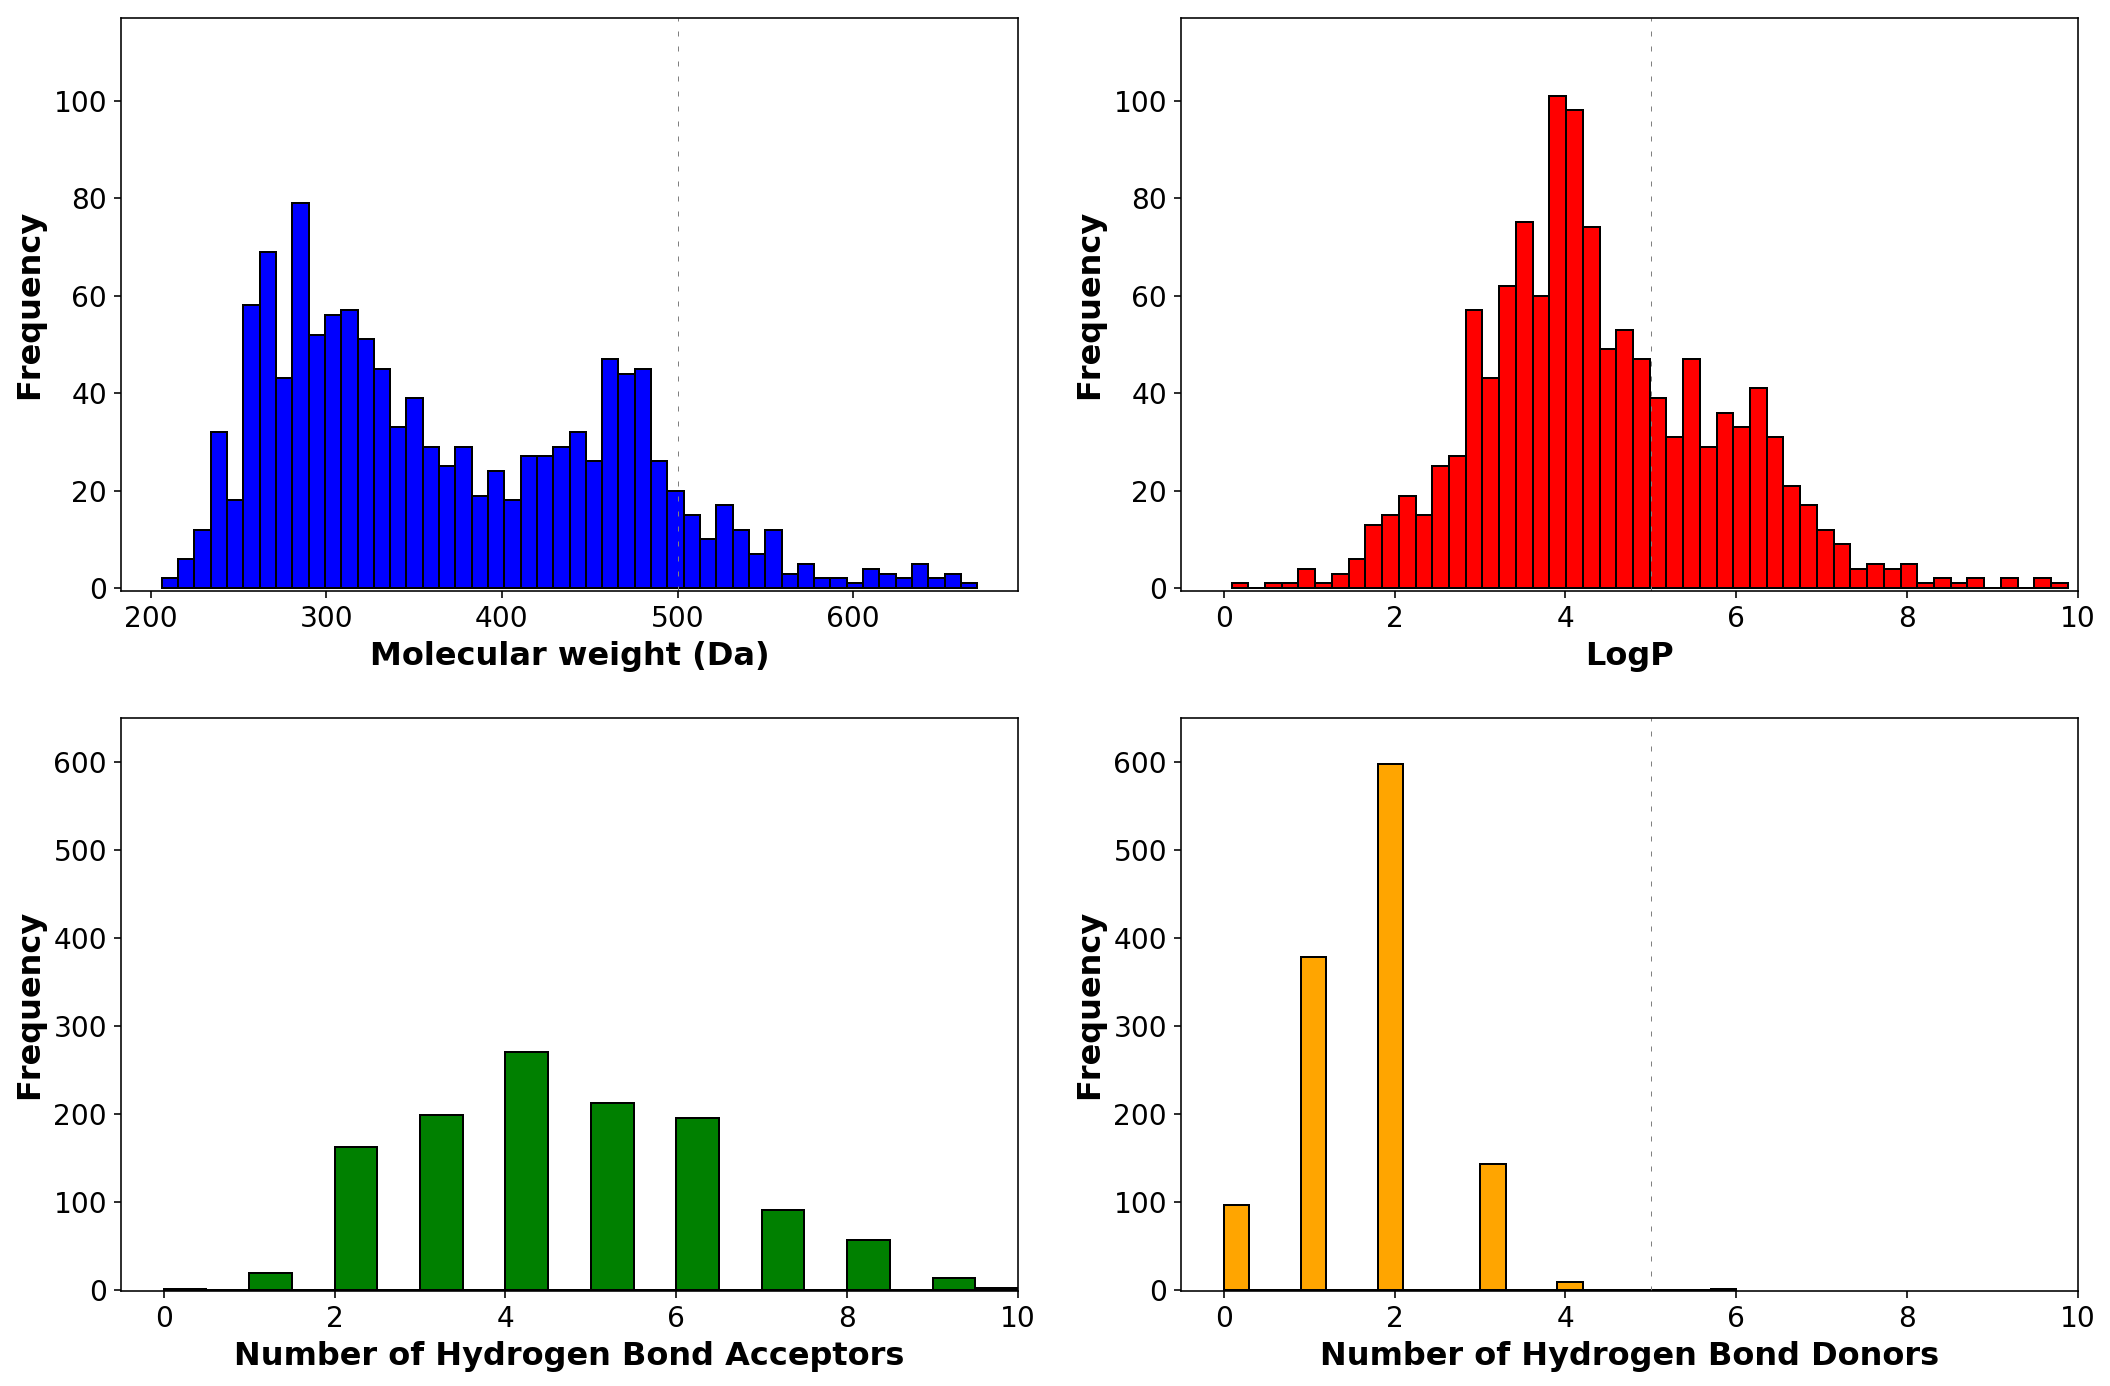

In [29]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)

# Histogram for MW
hist, bins = np.histogram(data['MW'], 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt1.bar(center, hist, align='center', width=width, color='blue',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt1.set_xlabel('Molecular weight (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)
#plt1.set_xlim(-0.5,10)
plt1.set_ylim(-0.5,117)
#plt1.grid(True)
plt1.axvline(500, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histogram for LogP
hist, bins = np.histogram(data['LogP'], 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt2.bar(center, hist, align='center', width=width, color='red',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
plt2.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_xlim(-0.5,10)
plt2.set_ylim(-0.5,117)
#plt2.grid(True)
plt2.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    
# Histogram for nHAcc
hist, bins = np.histogram(data['nHAcc'], 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt3.bar(center, hist, align='center', width=width, color='green',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt3.set_xlabel('Number of Hydrogen Bond Acceptors', fontsize=16, fontweight='bold')
plt3.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_xlim(-0.5,10)
plt3.set_ylim(-0.5,650)
#plt3.grid(True)
plt3.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histogram for nHDon
hist, bins = np.histogram(data['nHDon'], 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt4.bar(center, hist, align='center', width=width, color='orange',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt4.set_xlabel('Number of Hydrogen Bond Donors', fontsize=16, fontweight='bold')
plt4.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_xlim(-0.5,10)
plt4.set_ylim(-0.5,650)
#plt4.grid(True)
plt4.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
plt.savefig('Result/IC50-the histogram plots of the descriptors.pdf', dpi=300)

In [14]:
data.head(2)

,chemblId,STATUS,pIC50,MW,LogP,nHAcc,nHDon
0,CHEMBL370037,active,8.221849,252.269,3.2248,3,2
1,CHEMBL180300,active,8.886057,463.599,5.9280,6,2


In [30]:
data.to_csv('SubFiles/IC50_RO5.csv', sep=',' ,index=False)

In [31]:
data.head(2)

,chemblId,STATUS,IC50,MW,LogP,nHAcc,nHDon
0,CHEMBL370037,active,6.0,252.269,3.2248,3,2
1,CHEMBL189073,active,1727.0,277.279,4.0592,4,2
